In [1]:
import os, sys

import numpy as np
import pandas as pd

# %% 深度學習套件 deep learning related 
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torch.autograd import Variable


# # %% 視覺化/製圖套件 visualization / plotting
# # MacOSX 比較麻煩⋯⋯
# from platform import system
# if system() == "Darwin":
#     import matplotlib
#     matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

# %% 圖片處理套件 CV related
import cv2
from PIL import Image
import torchvision
import torchvision.transforms as transforms

# %% 文字處理套件 NLP related
# from gensim.models import word2vec

# %% 音訊處理套件 Speech related
# import torchaudio
# import librosa

# %% 好用的進度條和排版工具
##   progress bar and pretty print
from tqdm import tqdm


In [2]:
def cho_p(*x):
    print()
    for i in list(x):
        print(i)
        print()

def cho_t(*x):
    print()
    for i in list(x):
        print(type(i))
        print()

In [3]:
#!pip install torchviz
from torchviz import make_dot, make_dot_from_trace

---

In [4]:
layer1 = nn.Linear(1, 1)
#layer1.weight.requires_grad = False 
cho_p(layer1, layer1.weight, layer1.bias, layer1.parameters(), layer1.parameters)


Linear(in_features=1, out_features=1, bias=True)

Parameter containing:
tensor([[-0.5244]], requires_grad=True)

Parameter containing:
tensor([-0.8852], requires_grad=True)

<generator object Module.parameters at 0x0000016D3E34DA48>

<bound method Module.parameters of Linear(in_features=1, out_features=1, bias=True)>



## 生成 $y = wx + b$ 的 training data and label

In [5]:
torch.randn(100,)

tensor([-0.0206,  0.5009,  1.0722, -0.7258, -1.0150, -1.2813, -1.7274,  0.3237,
        -0.1923,  0.9217,  0.0713, -1.6072,  2.4942,  0.7655,  0.3800, -0.3752,
        -1.4215,  0.7925,  0.8755,  1.8539, -1.0536, -2.1190, -0.4993,  1.4558,
         1.1514,  0.1055, -1.4738,  0.1416,  0.3180, -1.5035,  0.1626,  2.1911,
        -0.5601, -0.8606,  0.8095,  2.1084,  0.8323, -0.5320, -0.7419, -1.6692,
        -0.2652, -0.0680, -1.0166,  0.2585, -1.4397, -1.8078,  1.1117, -0.0127,
        -0.5347, -1.1474,  1.1417,  0.3245, -0.3623, -0.8134, -1.2036,  0.9984,
        -1.8413, -0.1071, -1.4682,  0.7022, -0.2649, -1.1823, -0.3660,  0.4807,
        -1.3235, -0.6326, -1.2500, -2.1648, -0.7627, -2.3136, -0.4634, -0.6332,
        -0.1904, -1.0441,  1.1367, -0.0177, -0.1684, -1.3396,  0.1706, -0.9408,
         0.7068, -1.0328, -0.1850, -0.7639, -1.5670, -0.5530, -0.8753, -1.7688,
        -0.7732, -0.1734, -0.2727, -1.4064, -0.4088,  0.7577, -0.0837,  1.1487,
         1.1002,  0.3226, -0.3916,  0.17

In [6]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(7) # 用來確保每次生成的隨機資料是一樣的，否則訓練結果無法比較

x = np.random.rand(10000, 1)
y = 5 * x + 2 + .2 * np.random.randn(10000, 1) # randn 的 n 為 normal distribution

In [7]:
small_model = nn.Linear(1, 1)
cho_p(small_model, small_model.weight, small_model.bias, small_model.parameters()) # , small_model.parameters)


Linear(in_features=1, out_features=1, bias=True)

Parameter containing:
tensor([[0.7158]], requires_grad=True)

Parameter containing:
tensor([-0.5922], requires_grad=True)

<generator object Module.parameters at 0x0000016D42E107C8>



In [8]:
small_model = nn.Linear(1, 1)
optim = torch.optim.SGD(
    small_model.parameters(), lr=1e-2)
mse_loss = nn.MSELoss()
print("w: ",small_model.weight.item()," b: ", small_model.bias.item())

for i in range(len(x)):
    optim.zero_grad()
    xi = torch.FloatTensor([x[i]])
    yi = torch.FloatTensor([y[i]])
    loss = mse_loss(small_model(xi),yi)
    loss.backward()
    optim.step()
    if i % (len(x)//10) == 0:
        print()
        print(i)
        print("w: ",small_model.weight.item()," b: ", small_model.bias.item())
        print("Loss : ",loss.item())
print()
print("w: ",small_model.weight.item()," b: ", small_model.bias.item())
print("Loss: ",loss.item())

w:  0.5863444805145264  b:  0.09398031234741211

0
w:  0.5898919701576233  b:  0.14046955108642578
Loss :  5.403123378753662

1000
w:  4.323822975158691  b:  2.3504433631896973
Loss :  0.009650561958551407

2000
w:  4.800905227661133  b:  2.101433753967285
Loss :  0.018129272386431694

3000
w:  4.937617778778076  b:  2.016845703125
Loss :  0.11228221654891968

4000
w:  4.986978530883789  b:  2.030837059020996
Loss :  0.03493896871805191

5000
w:  4.9838714599609375  b:  2.024007797241211
Loss :  0.0038880917709320784

6000
w:  4.994313716888428  b:  2.030492067337036
Loss :  0.015956833958625793

7000
w:  4.972951412200928  b:  1.9860724210739136
Loss :  0.16605257987976074

8000
w:  4.997638702392578  b:  2.046839714050293
Loss :  0.282004177570343

9000
w:  5.003909587860107  b:  2.0204761028289795
Loss :  0.016852084547281265

w:  4.967189311981201  b:  1.9912008047103882
Loss:  0.019613582640886307


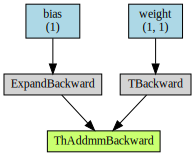

In [9]:
x_final = torch.FloatTensor([x[-1]])
make_dot(small_model(x_final), params=dict(small_model.named_parameters()))

## 固定某 nn 的變量去求 grandient descent

In [10]:
small_model = nn.Linear(1, 1)
small_model.bias.requires_grad = False 
optim = torch.optim.SGD(
    small_model.parameters(), lr=1e-2)
mse_loss = nn.MSELoss()
print("w: ",small_model.weight.item()," b: ", small_model.bias.item())
# 66次 gd
#for i in range(66):

for i in range(len(x)):
    optim.zero_grad()
    xi = torch.FloatTensor([x[i]])
    yi = torch.FloatTensor([y[i]])
    loss = mse_loss(small_model(xi),yi)
    loss.backward()
    optim.step()
    if i % (len(x)//10) == 0:
        print()
        print(i)
        print("w: ",small_model.weight.item()," b: ", small_model.bias.item())
        print("Loss : ",loss.item())
print()
print("w: ",small_model.weight.item()," b: ", small_model.bias.item())
print("Loss: ",loss.item())

w:  -0.5506856441497803  b:  0.06577181816101074

0
w:  -0.5469626784324646  b:  0.06577181816101074
Loss :  5.9508442878723145

1000
w:  7.946437835693359  b:  0.06577181816101074
Loss :  4.316828727722168

2000
w:  7.934015274047852  b:  0.06577181816101074
Loss :  0.08535776287317276

3000
w:  7.922224998474121  b:  0.06577181816101074
Loss :  0.1916053146123886

4000
w:  7.888660907745361  b:  0.06577181816101074
Loss :  0.12165824323892593

5000
w:  7.868988990783691  b:  0.06577181816101074
Loss :  0.4885231852531433

6000
w:  7.862735271453857  b:  0.06577181816101074
Loss :  3.255232810974121

7000
w:  7.800544261932373  b:  0.06577181816101074
Loss :  0.2031242996454239

8000
w:  7.913956165313721  b:  0.06577181816101074
Loss :  0.11175747215747833

9000
w:  7.9298200607299805  b:  0.06577181816101074
Loss :  1.6442614793777466

w:  7.824228286743164  b:  0.06577181816101074
Loss:  2.6078619956970215


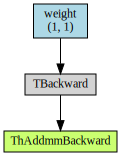

In [11]:
x_final = torch.FloatTensor([x[-1]])
make_dot(small_model(x_final), params=dict(small_model.named_parameters()))

In [19]:
 w *  torch.from_numpy(x)

RuntimeError: Expected object of type torch.FloatTensor but found type torch.DoubleTensor for argument #2 'other'

In [13]:
from torch import optim
torch.manual_seed(7)
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
print(w,b)
lr = 1e-1
epochs = 5
# 指定我們的優化器為 SGD
optimizer = optim.SGD([w,b], lr=lr)
for epoch in range(epochs):
    yhat = b + w * torch.from_numpy(x)
    print(yhat)
    print()
    error = torch.from_numpy(y) - yhat
    loss = (error ** 2).mean()
    loss.backward()    
    
    # 不用手動更新梯度
    # a -= lr * a.grad
    # b -= lr * b.grad
    optimizer.step()
    
    # 不用自己將梯度清零
    # a.grad.zero_()
    # b.grad.zero_()
    optimizer.zero_grad()
    
print(w,b)

tensor([-0.1468], requires_grad=True) tensor([0.7861], requires_grad=True)


RuntimeError: Expected object of type torch.FloatTensor but found type torch.DoubleTensor for argument #2 'other'

# CNN

In [20]:
m = nn.Conv2d(1,1,3)
cho_p(m, m.weight, m.bias)


Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))

Parameter containing:
tensor([[[[-0.1782, -0.0500, -0.1953],
          [ 0.0865, -0.0898,  0.2342],
          [ 0.2366,  0.0340, -0.1421]]]], requires_grad=True)

Parameter containing:
tensor([-0.1958], requires_grad=True)



In [21]:
input = torch.randn(1,1,6,6).zero_()
input = torch.ones(1,1,6,6)
input

tensor([[[[1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.]]]])

In [22]:
gaussian_kernel = torch.tensor([[1., 2, 1],[2, 4, 2],[1, 2, 1]]) / 16.0
gaussian_kernel

tensor([[0.0625, 0.1250, 0.0625],
        [0.1250, 0.2500, 0.1250],
        [0.0625, 0.1250, 0.0625]])

In [23]:
m = nn.Conv2d(1,1,3)
m.weight.data[:] = gaussian_kernel #torch.ones(1,1,3,3)
cho_p(m, m.weight, m.bias)
m(input)


Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))

Parameter containing:
tensor([[[[0.0625, 0.1250, 0.0625],
          [0.1250, 0.2500, 0.1250],
          [0.0625, 0.1250, 0.0625]]]], requires_grad=True)

Parameter containing:
tensor([0.3145], requires_grad=True)



tensor([[[[1.3145, 1.3145, 1.3145, 1.3145],
          [1.3145, 1.3145, 1.3145, 1.3145],
          [1.3145, 1.3145, 1.3145, 1.3145],
          [1.3145, 1.3145, 1.3145, 1.3145]]]], grad_fn=<ThnnConv2DBackward>)

In [24]:
cho_p(torch.randn(0),torch.randn(1),torch.randn(2),torch.randn(1,1),torch.randn(2,2),torch.randn(1,2,2),torch.randn(1,1,1,1))


tensor([])

tensor([-0.0773])

tensor([-0.9224, -1.8941])

tensor([[1.0056]])

tensor([[-0.6948,  0.9062],
        [ 0.1072,  0.6125]])

tensor([[[ 0.3296, -0.8763],
         [-1.6768, -0.7247]]])

tensor([[[[0.9634]]]])

